# Telecom Customer Churn dataset

## Objectives:
To carry out visulizatiaon for the following:
1. Compare the churn count with respect to gender
2. Find out how many female senior citizens there are in the dataset
3. Compare tenure with total charges
4. Find out the preferred form of contract among senior citizens
5.  Comment your finds on payment methods

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset using pandas

In [2]:
df = pd.read_csv("Data\Telco-Customer-Churn.xlsx - Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns

#### Column Names

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 1.Comparing churn count with respect to gender

In [5]:
df_2 = df[['gender', 'Churn']]
df_2

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes
...,...,...
7038,Male,No
7039,Female,No
7040,Female,No
7041,Male,Yes


Defining a separate dataframe df_2 which has only gender and churn columns.

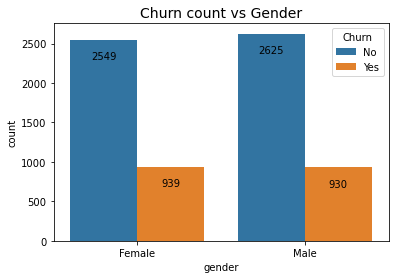

In [6]:
graph_1 = sns.countplot(x = 'gender', hue = 'Churn', data = df_2, )
rects = graph_1.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_1.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Churn count vs Gender', fontsize = 14)
plt.show()

### Insights:
Churn count is slightly higher among the female customers. 939 out of 3488 female customers switched business while 930 among male customers switched.

## 2. Number of female senior citizens.

In [7]:
df_3 = df[['gender', 'SeniorCitizen']].loc[df['gender'] == 'Female']
df_3

,gender,SeniorCitizen
0,Female,0
4,Female,0
5,Female,0
7,Female,0
8,Female,0
...,...,...
7034,Female,0
7036,Female,0
7037,Female,0
7039,Female,0


Defining a separate dataframe df_3 which satisfy the conditions: female and senior citizens.

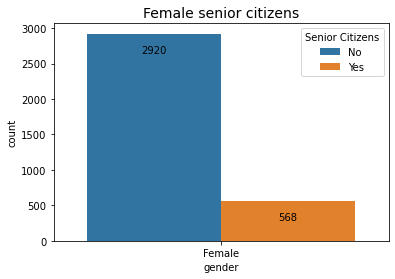

In [8]:
graph_2 = sns.countplot(x = 'gender', hue = 'SeniorCitizen', data = df_3, )
rects = graph_2.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_2.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Female senior citizens', fontsize = 14)
plt.legend(title='Senior Citizens', loc='best', labels=['No', 'Yes'])
plt.show()

### Insights:
568 out of total 3488 female coustomers are senior citizens.

## 3. Comparing tenure with total charges

In [9]:
#df['TotalCharges'].astype(float, errors='raise')

TotalCharges column contains non numerical type data found by code line above

In [10]:
list1 = []
for each in df['TotalCharges']:
    try:
        float(each)
    except ValueError:
        list1.append(each)
print(list1)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


Finding the type of non numerical value in TotalCharges column using try and except.

In [11]:
df_4 = df[['tenure', 'TotalCharges']]

Defining a new dataframe to include only tenure and totalcharges columns.

In [12]:
df_4 = df_4.replace({' ': 0})

Replacing string with zeros.

In [13]:
df_4.loc[df_4['TotalCharges'] == ' ']

,tenure,TotalCharges


In [14]:
df_4.loc[df_4['TotalCharges'] == 0]

,tenure,TotalCharges
488,0,0
753,0,0
936,0,0
1082,0,0
1340,0,0
3331,0,0
3826,0,0
4380,0,0
5218,0,0
6670,0,0


In [15]:
df_4 = df_4.astype({'tenure': 'int64', 'TotalCharges': 'float'})

Converting TotalCharges column from object to float.

In [16]:
df_4['TotalCharges'].dtype

dtype('float64')

#### Scatter plot of tenure vs total charges

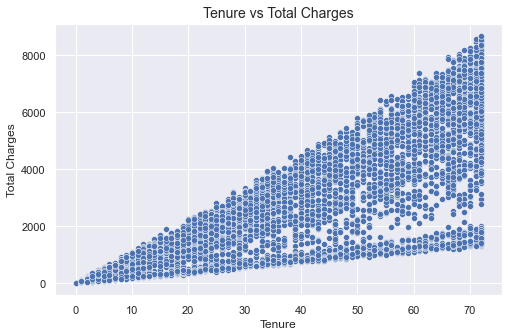

In [26]:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=df_4, x='tenure', y='TotalCharges')
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Total Charges', fontsize = 12)
plt.title('Tenure vs Total Charges', fontsize=14)
plt.show()

### Insights:
Total charges and tenure exhibit a positive correlation.

## 4. Contract preferred by senior citizens

In [28]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

There appears to be three types of contracts in the dataset; namely Mont-to-month, Two year, and One year. Month-to-month seem to be the overall preferred form of contract.

In [29]:
df_5 = df[['SeniorCitizen', 'Contract']].loc[df['SeniorCitizen'] == 1]
df_5

,SeniorCitizen,Contract
20,1,Month-to-month
30,1,Two year
31,1,Month-to-month
34,1,Month-to-month
50,1,Month-to-month
...,...,...
7023,1,Month-to-month
7029,1,Month-to-month
7031,1,One year
7032,1,Month-to-month


Defining a dataframe df_5 consisting of just senior citizens and their contract types

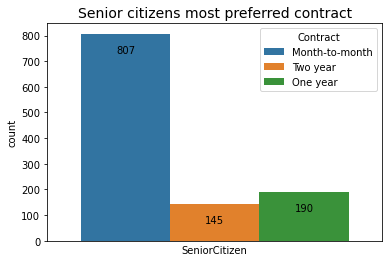

In [30]:
graph_3 = sns.countplot(x = 'SeniorCitizen', hue = 'Contract', data = df_5 )
rects = graph_3.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_3.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Senior citizens most preferred contract', fontsize = 14)
plt.xticks([])
plt.show()

### Insight:
Most preferred form of contract by senior citizens is month-to-month.

## 5. Insights on payment methods

In [31]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

There are four payment methods, namely Electronic check, Mailed check, Bank transfer, and Credit card.

In [32]:
df_6 = df[['SeniorCitizen', 'PaymentMethod']].loc[df['SeniorCitizen'] == 1]
df_6

,SeniorCitizen,PaymentMethod
20,1,Electronic check
30,1,Credit card (automatic)
31,1,Credit card (automatic)
34,1,Bank transfer (automatic)
50,1,Electronic check
...,...,...
7023,1,Electronic check
7029,1,Electronic check
7031,1,Credit card (automatic)
7032,1,Electronic check


df_6 is a dataframe containing senior citizens and their payment methods.

In [34]:
df_7 = df[['SeniorCitizen', 'PaymentMethod']].loc[df['SeniorCitizen'] == 0]
df_7

,SeniorCitizen,PaymentMethod
0,0,Electronic check
1,0,Mailed check
2,0,Mailed check
3,0,Bank transfer (automatic)
4,0,Electronic check
...,...,...
7037,0,Bank transfer (automatic)
7038,0,Mailed check
7039,0,Credit card (automatic)
7040,0,Electronic check


df_7 is a dataframe containing payment methods of non-senior citizens.

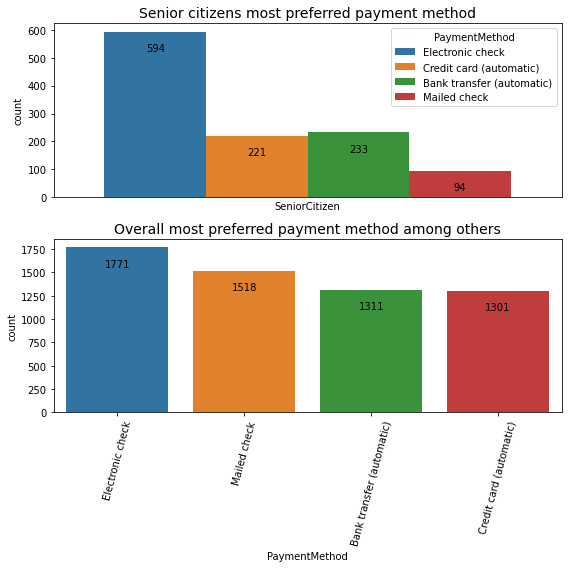

In [36]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
graph_4 = sns.countplot(x = 'SeniorCitizen', hue = 'PaymentMethod', data = df_6 )
rects = graph_4.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_4.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Senior citizens most preferred payment method', fontsize = 14)
plt.xticks([])

plt.subplot(2, 1, 2)
graph_5 = sns.countplot(x = 'PaymentMethod', data = df_7)
rects = graph_5.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_5.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Overall most preferred payment method among others', fontsize = 14)
plt.xticks(rotation=75)

plt.tight_layout()

### Insight:
Most preferred payment method among senior citizens is Electronic check.
Payment methods preferred by others does't seem to vary significantly.